In [369]:
# Importando as bibliotecas necessárias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usando a função mágica para exibição:
%matplotlib inline

In [370]:
# Importando os dados:
df = pd.read_csv('training.csv', header=None)

# Definindo o número de amostras:
M = len(df[0].to_numpy())

# Definindo os valores de entrada:
x0 = np.ones((M, 1))
x  = (df[0].to_numpy()).reshape(M, 1)

# Definindo os valores de saída:
y  = (df[1].to_numpy()).reshape(M, 1)

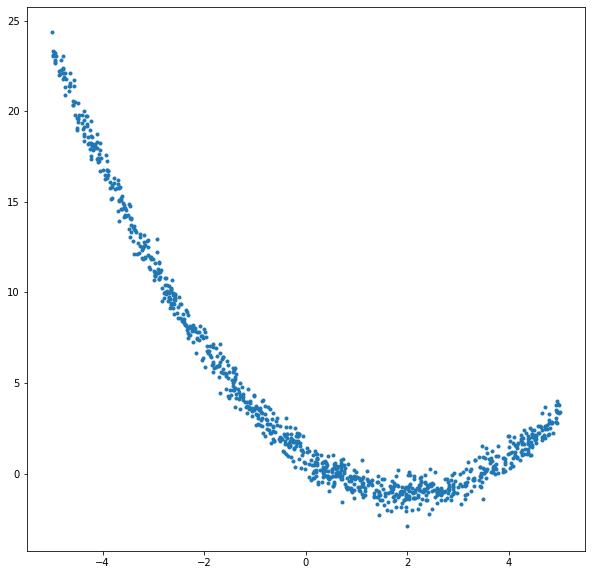

In [371]:
# Plotando o gráfico
fig = plt.figure(figsize=(10, 10))
plt.plot(x,y,'.')
plt.show()

In [372]:
# Concatenação dos valores de X's:
X = np.c_[x0, x, x**2, x**3, x**4]

# Aplicação da formula fechada:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
y_hat = a_opt[0,0] + a_opt[1, 0] * x + a_opt[2, 0] * x**2 + a_opt[3, 0] * x**3 + a_opt[4, 0] * x**4
j_opt = (1/M)*np.sum(np.power((y - y_hat), 2))

In [373]:
# Imprimindo os valores encontrados:
print('O valor de a0 ótimo encontrado pela formula fechada é: {}'.format(a_opt[0, 0]))
print('O valor de a1 ótimo encontrado pela formula fechada é: {}'.format(a_opt[1, 0]))
print('O valor de a2 ótimo encontrado pela formula fechada é: {}'.format(a_opt[2, 0]))
print('O valor de a3 ótimo encontrado pela formula fechada é: {}'.format(a_opt[3, 0]))
print('O valor de a4 ótimo encontrado pela formula fechada é: {}'.format(a_opt[4, 0]))

O valor de a0 ótimo encontrado pela formula fechada é: 0.9936462095408933
O valor de a1 ótimo encontrado pela formula fechada é: -2.0136007805032823
O valor de a2 ótimo encontrado pela formula fechada é: 0.49833458665409863
O valor de a3 ótimo encontrado pela formula fechada é: 0.0003376517985655969
O valor de a4 ótimo encontrado pela formula fechada é: 1.5787863002828667e-05


In [374]:
# Definindo o PASSO DE APRENDIZAGEM: 
alpha = 0.000008

# Criando o vetor de ARMAZENAMENTO dos PESOS:
a = np.zeros((5, 1))

# Definindo os valores INICIAIS dos PESOS:
a[0, 0] = -10
a[1, 0] = -10
a[2, 0] = -10
a[3, 0] = -10
a[4, 0] = -10

# Criando a matriz de HISTÓRICO dos PESOS:
a_hist = np.zeros((5, M+1))

# Criando a matriz de HISTÓRICO dos ERROS:
jgd = np.zeros(M+1)

# Definindo o valor INICIAL do ERRO:
jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [375]:
# Definindo p valor INICIAL de ITERAÇÃO:
iteration = 0

# Criando a matriz de GRADIENTES HISTÓRICOS:
grad_hist = np.zeros((5, M+1))

In [376]:
while iteration < M:
    
    gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    grad_hist[2, iteration] = gradients[2, 0]
    grad_hist[3, iteration] = gradients[3, 0]
    grad_hist[4, iteration] = gradients[4, 0]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0,0]
    a_hist[1, iteration+1] = a[1,0]
    a_hist[2, iteration+1] = a[2,0]
    a_hist[3, iteration+1] = a[3,0]
    a_hist[4, iteration+1] = a[4,0]
    
    jgd[iteration+1] = (1.0/M)*sum(np.power( (y - X.dot(a)) , 2))
    
    iteration += 1   

In [377]:
print('O valor de a0 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))
print('O valor de a2 ótimo encontrado pelo gradiente é: {}'.format(a[2, 0]))
print('O valor de a3 ótimo encontrado pelo gradiente é: {}'.format(a[3, 0]))
print('O valor de a4 ótimo encontrado pelo gradiente é: {}'.format(a[4, 0]))


O valor de a0 ótimo encontrado pelo gradiente é: -9.585799362429587
O valor de a1 ótimo encontrado pelo gradiente é: -9.250008663354203
O valor de a2 ótimo encontrado pelo gradiente é: -7.740696612473586
O valor de a3 ótimo encontrado pelo gradiente é: 0.3821656614558975
O valor de a4 ótimo encontrado pelo gradiente é: 0.4535478194334642


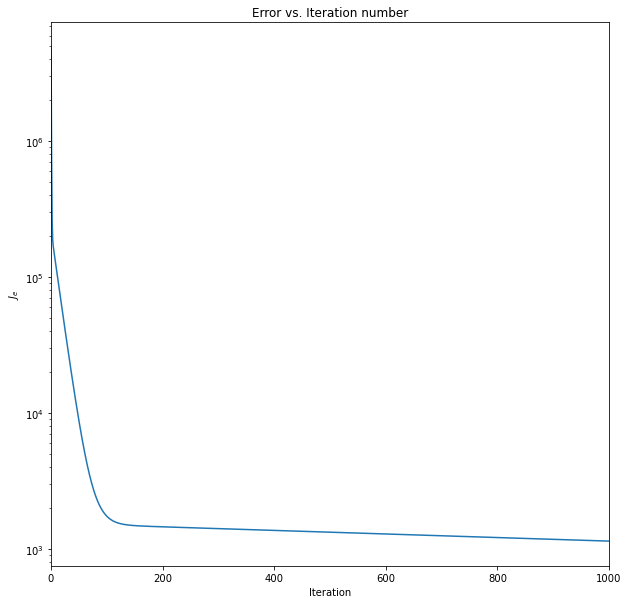

In [378]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

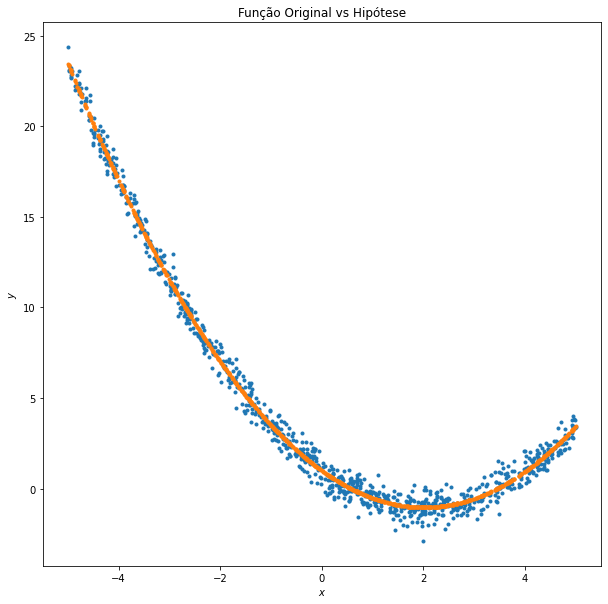

In [379]:
fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, '.')
plt.plot(x, y_hat, '.')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Função Original vs Hipótese')
plt.show()